In [140]:
from IPython.core.debugger import set_trace
from bs4 import BeautifulSoup
import pandas as pd
import re
import lxml
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [165]:
%%time
f = 'takeout-20210313T170711Z-001/Takeout/My Activity/Search/MyActivity.html'

contents = open(f, 'r', encoding="utf8")
# print(contents)
soup = BeautifulSoup(contents, "lxml")
contents.close()
# soup

Wall time: 3.79 s


In [166]:
divs = soup.find_all('div', {'class': ['content-cell', 'mdl-cell', 'mdl-cell--6-col', 'mdl-typography--body-1']})
# divs

In [167]:
d = [] 
for div in divs:
    d.append(div.text)

In [168]:
d = d[::5]
# d[0][:6]

In [169]:
from datetime import datetime

In [170]:
month_date = d[5].split('\xa0')[1].split(',')[0][-6:]
year = d[5].split('\xa0')[1].split(',')[1][1:]

full_date = f'{month_date[:3]}/{month_date[-2:]}/{year}'
print(full_date)

# datetime_object = datetime.strptime(full_date, '%b/%d/%y')

# datetime_object
# print(len(d[5].split('\xa0')[1].split(',')[1][-5:].split(' ')[0]))

Mar/13/2021


In [171]:
data = {}
data['type'] = []
data['action'] = []
data['text'] = []
data['date'] = []

for i in range(len(d)-1):
    
    try:
        data['type'].append(d[i][:6])
    except:
        data['type'].append('No type')
    
    try:
        data['action'].append(d[i].split('\xa0')[0][6:])
    except:
        data['action'].append('No Action')
    
    _full = d[i].split('\xa0')[1].split(',')[0]
    _year = d[i].split('\xa0')[1].split(',')[1][1:]
    _text = d[i].split('\xa0')[1].split(',')[0][:-10]
    _match = re.search(r'\d+$', _text)
    
    if _match:
        data['text'].append(_text[:-1])
    else:
        data['text'].append(_text[:])
        
    try:
        if(len(_full[-5:].split(' ')[0]) == 2):
            date = f'{_full[-6:]} {year}'
            data['date'].append(date)
        else:
            date = f'{_full[-5:]} {year}'
            data['date'].append(date)
    except:
        data['date'].append('No date')

In [172]:
df = pd.DataFrame.from_dict(data)
df.head(50)

,type,action,text,date
0,Search,Visited,Tiava: Free Porn Vi,Mar 13 2021
1,Search,Searched for,,Mar 13 2021
2,Search,Searched for,currency conve,Mar 13 2021
3,Search,Searched for,pcie x8 graphics,Mar 13 2021
4,Search,Visited,Best pci-e x8 nvidia card | NVIDIA GeForce Fo,Mar 13 2021
5,Search,Searched for,nvidia gpu 8x,Mar 13 2021
6,Search,Searched for,gpu 8x,Mar 13 2021
7,Search,Visited,Heroku: Cloud Application Plat,Mar 13 2021
8,Search,Searched for,heroku l,Mar 13 2021
9,Search,Visited,sqlparse ·,Mar 13 2021


In [173]:
df.to_csv('data/google_history/my_search_history.csv')

#### Load preprocessed data

In [174]:
df = pd.read_csv('data/google_history/my_search_history.csv')

In [175]:
df['text'] = df.text.map(str)

In [176]:
def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)

In [177]:
df['text'] = df.text.map(lambda x: remove_URL(x))

In [178]:
df = df[df.text != '']

In [179]:
import string

def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)

In [180]:
df['text'] = df.text.map(lambda x: remove_punct(x))

In [181]:
df['date'] = pd.to_datetime(df['date'], format='%b %d %Y', errors='coerce')

In [160]:
df = df.copy()
df['title_word_count'] = df.text.str.split().map(lambda x: len(x))

In [182]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year

In [184]:
df.head(4)

,Unnamed: 0,type,action,text,date,month,day,year
0,0,Search,Visited,Tiava Free Porn Vi,2021-03-13,3.0,13.0,2021.0
1,1,Search,Searched for,nan,2021-03-13,3.0,13.0,2021.0
2,2,Search,Searched for,currency conve,2021-03-13,3.0,13.0,2021.0
3,3,Search,Searched for,pcie x8 graphics,2021-03-13,3.0,13.0,2021.0


#### GENERATING n_grams from whole corpus

In [215]:
from nltk.corpus import stopwords

def generate_ngrams(text, n_gram=1, stop=True):
    """
    Simple n-grams generator.
    """
    stop = set(stopwords.words("english")) if stop else {}
    
    token = [
        token for token in text.lower().split(" ") if token != "" if token not in stop
    ]
    
    z = zip(*[token[i:] for i in range(n_gram)])

    ngrams = [" ".join(ngram) for ngram in z]
    
    return ngrams

In [217]:
from collections import defaultdict

unigrams = defaultdict(int)
bigrams = defaultdict(int)
trigrams = defaultdict(int)
fourgrams = defaultdict(int)

for text in df.text:
    for word in generate_ngrams(text):
        unigrams[word] += 1

for text in df.text:
    for word in generate_ngrams(text, n_gram=2):
        bigrams[word] += 1

for text in df.text:
    for word in generate_ngrams(text, n_gram=3):
        trigrams[word] += 1

for text in df.text:
    for word in generate_ngrams(text, n_gram=4):
        fourgrams[word] += 1

In [218]:
unigrams = pd.DataFrame.from_dict(unigrams,orient='index').reset_index()
bigrams = pd.DataFrame.from_dict(bigrams,orient='index').reset_index()
trigrams = pd.DataFrame.from_dict(trigrams,orient='index').reset_index()
fourgrams = pd.DataFrame.from_dict(fourgrams,orient='index').reset_index()

In [222]:
trigrams.head(4)

,index,0
0,tiava free porn,6
1,free porn vi,9
2,pcie x8 graphics,1
3,best pcie x8,1


In [228]:
allgrams = pd.concat([bigrams, trigrams, fourgrams])
allgrams.sort_values(0, ascending=False, inplace=True)

#underlines for ngrams, doesn't do anything for unigrams
allgrams['index'] = allgrams['index'].replace(' ', '_', regex=True)

corpus = allgrams['index'].to_list()

In [229]:
word_cloud = WordCloud(background_color="white", max_font_size=50, min_word_length=3, scale=2).generate(
    " ".join(corpus[:50])
)

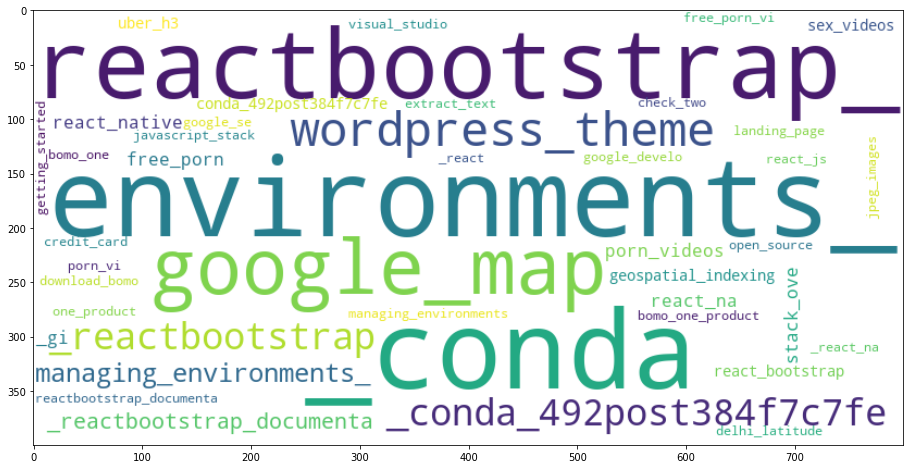

In [230]:
plt.figure(1, figsize=(16, 8))
plt.subplot(1, 1, 1)
plt.imshow(word_cloud,interpolation='bilinear')


In [231]:
agg_df = df.groupby('month').agg({'text': lambda x: x.tolist()}).reset_index()

agg_df['text'] = agg_df.text.map(lambda x: [i.replace(' ', '_') for i in x])

agg_df['text'] = agg_df.text.map(lambda x: [i for i in x if '_' in i])

In [232]:
monthly_data = {}
for i in range(len(agg_df)):
    sub = pd.DataFrame({'text':agg_df.iloc[i].text})
    monthly_data[str(agg_df.iloc[i].month)] = sub.text.value_counts()[:25].to_dict()

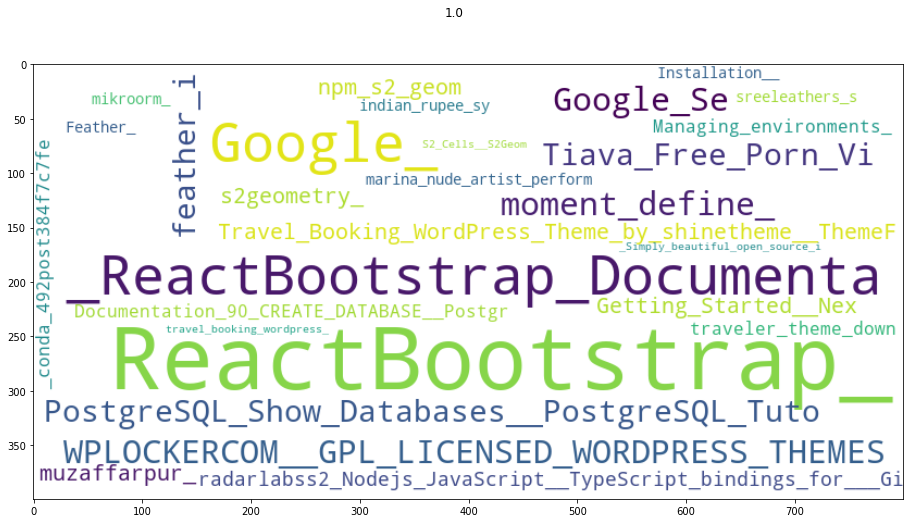

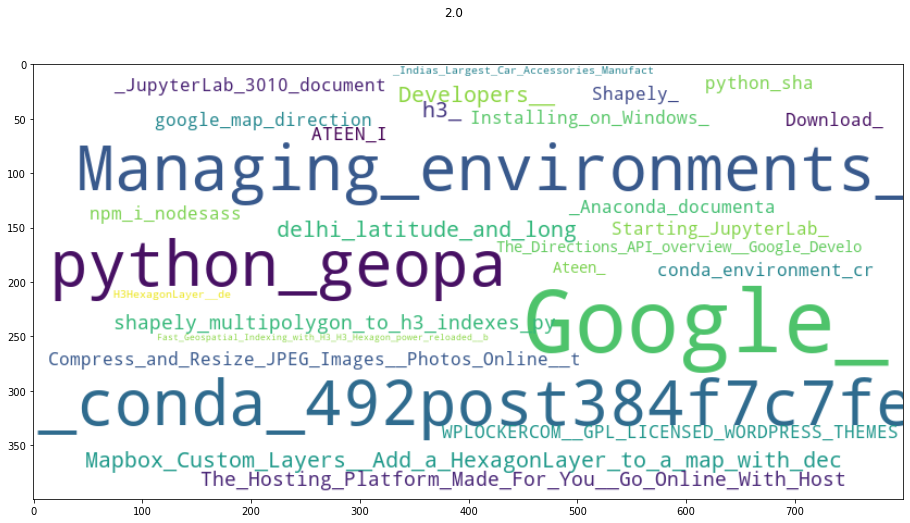

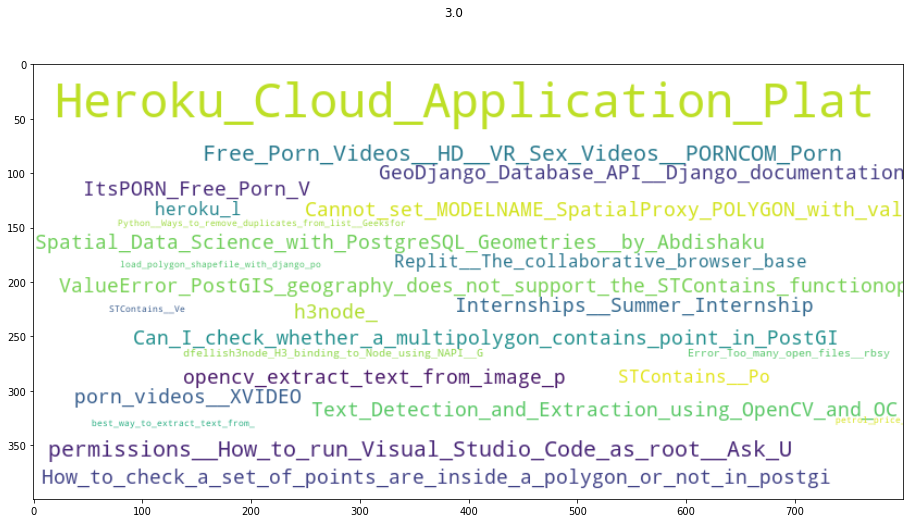

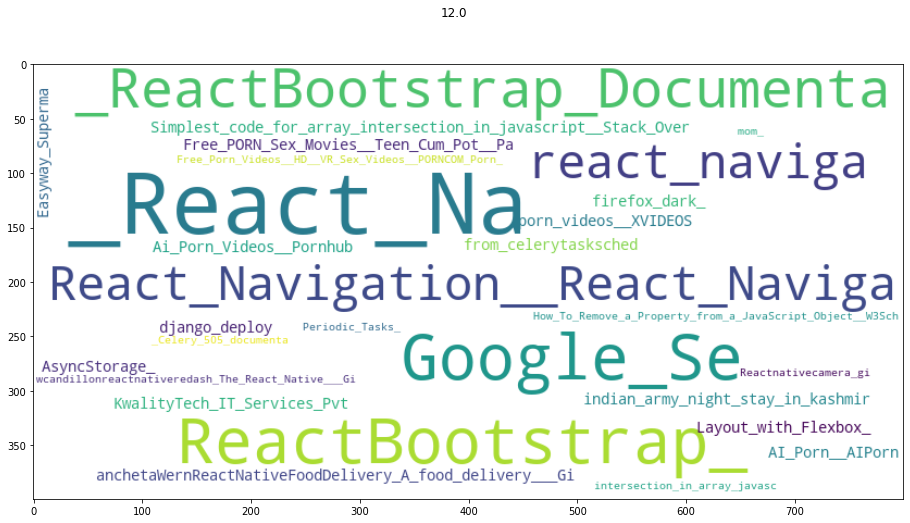

In [233]:
for i,k in enumerate(monthly_data.keys()):
    word_cloud = WordCloud(background_color="white", max_font_size=40, min_word_length=3, scale=2).generate(
        " ".join(monthly_data[k])
    )  
    plt.figure(i, figsize=(16, 8))
    plt.suptitle(k)
    plt.subplot(1, 1, 1)
    plt.imshow(word_cloud,interpolation='bilinear')